#DSA4020A Assignment 1 - NGrams
The goal of this lab assignment is to understand how different n-gram sizes and
smoothing techniques affect the performance of language models. You will implement
n-gram models, apply various smoothing techniques, and evaluate their performance
using a sample text dataset i.e. Movie Review Dataset (available on Kaggle)

##Step 1: Data Preparation
### 1.1 Download Necessary Libraries
I started by downloading the necessary libraries:

In [105]:
#Libraries
import pandas as pd
import numpy as np

import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
# Download NLTK resources
nltk.download('punkt')

from collections import defaultdict

import matplotlib.pyplot as plt

import random

from sklearn.model_selection import KFold

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1.2 Load the dataset
I downloaded the IMDB dataset from Kaggle, then loaded it and showed the first 5 entries of the dataset.

In [2]:
from google.colab import files

# Open a dialog to select files from your computer
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes.')


Saving IMDB Dataset.csv to IMDB Dataset.csv
User uploaded file "IMDB Dataset.csv" with length 66212309 bytes.


In [135]:
# Load the uploaded CSV file into a pandas DataFrame
data = pd.read_csv('IMDB Dataset.csv')

# Preview the data
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### 1.3 Preprocess the data
I tokenized the text, converted it to lowercase and removed special characters from the dataset.

In [136]:
# Preprocess text (tokenize, lowercase, remove punctuation)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize words
    words = word_tokenize(text)

    return words

# Apply preprocessing to the dataset
data['processed_review'] = data['review'].apply(preprocess_text)

#view results
print(data.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                    processed_review  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, br, br, the...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, theres, a, family, where, a, littl...  
4  [petter, matteis, love, in, the, time, of, mon...  


## Step 2: Implement N-Gram Models
### 2.1 Generate N-Grams
I then generated N-grams for values of 1, 2, 3 and 4, as shown below:

In [137]:
# Function to generate n-grams
def generate_ngrams(words, n):
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Function to count n-grams frequencies
def count_ngrams(reviews, n):
    ngram_counts = defaultdict(int)
    for review in reviews:
        ngrams = generate_ngrams(review, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return ngram_counts

# Example for unigrams (n=1)
unigram_counts = count_ngrams(data['processed_review'], 1)

# Print a few examples of unigrams and their frequencies
print(list(unigram_counts.items())[:10])

[('one', 51024), ('of', 288382), ('the', 663837), ('other', 17908), ('reviewers', 502), ('has', 32894), ('mentioned', 1029), ('that', 136090), ('after', 14758), ('watching', 8991)]


In [138]:
# Example for bigrams (n=2)
bigram_counts = count_ngrams(data['processed_review'], 2)

# Print a few examples of bigrams and their frequencies
print(list(bigram_counts.items())[:10])

[('one of', 16152), ('of the', 77006), ('the other', 4776), ('other reviewers', 170), ('reviewers has', 2), ('has mentioned', 13), ('mentioned that', 73), ('that after', 146), ('after watching', 610), ('watching just', 34)]


In [139]:
# Example for trigrams (n=3)
trigram_counts = count_ngrams(data['processed_review'], 3)

# Print a few examples of trigrams and their frequencies
print(list(trigram_counts.items())[:10])

[('one of the', 9781), ('of the other', 580), ('the other reviewers', 67), ('other reviewers has', 1), ('reviewers has mentioned', 1), ('has mentioned that', 2), ('mentioned that after', 1), ('that after watching', 11), ('after watching just', 1), ('watching just 1', 1)]


In [140]:
# Example for fourgrams (n=4)
fourgram_counts = count_ngrams(data['processed_review'], 4)

# Print a few examples of bigrams and their frequencies
print(list(fourgram_counts.items())[:10])

[('one of the other', 52), ('of the other reviewers', 25), ('the other reviewers has', 1), ('other reviewers has mentioned', 1), ('reviewers has mentioned that', 1), ('has mentioned that after', 1), ('mentioned that after watching', 1), ('that after watching just', 1), ('after watching just 1', 1), ('watching just 1 oz', 1)]


I visualised the top ten n-grams per category as follows:

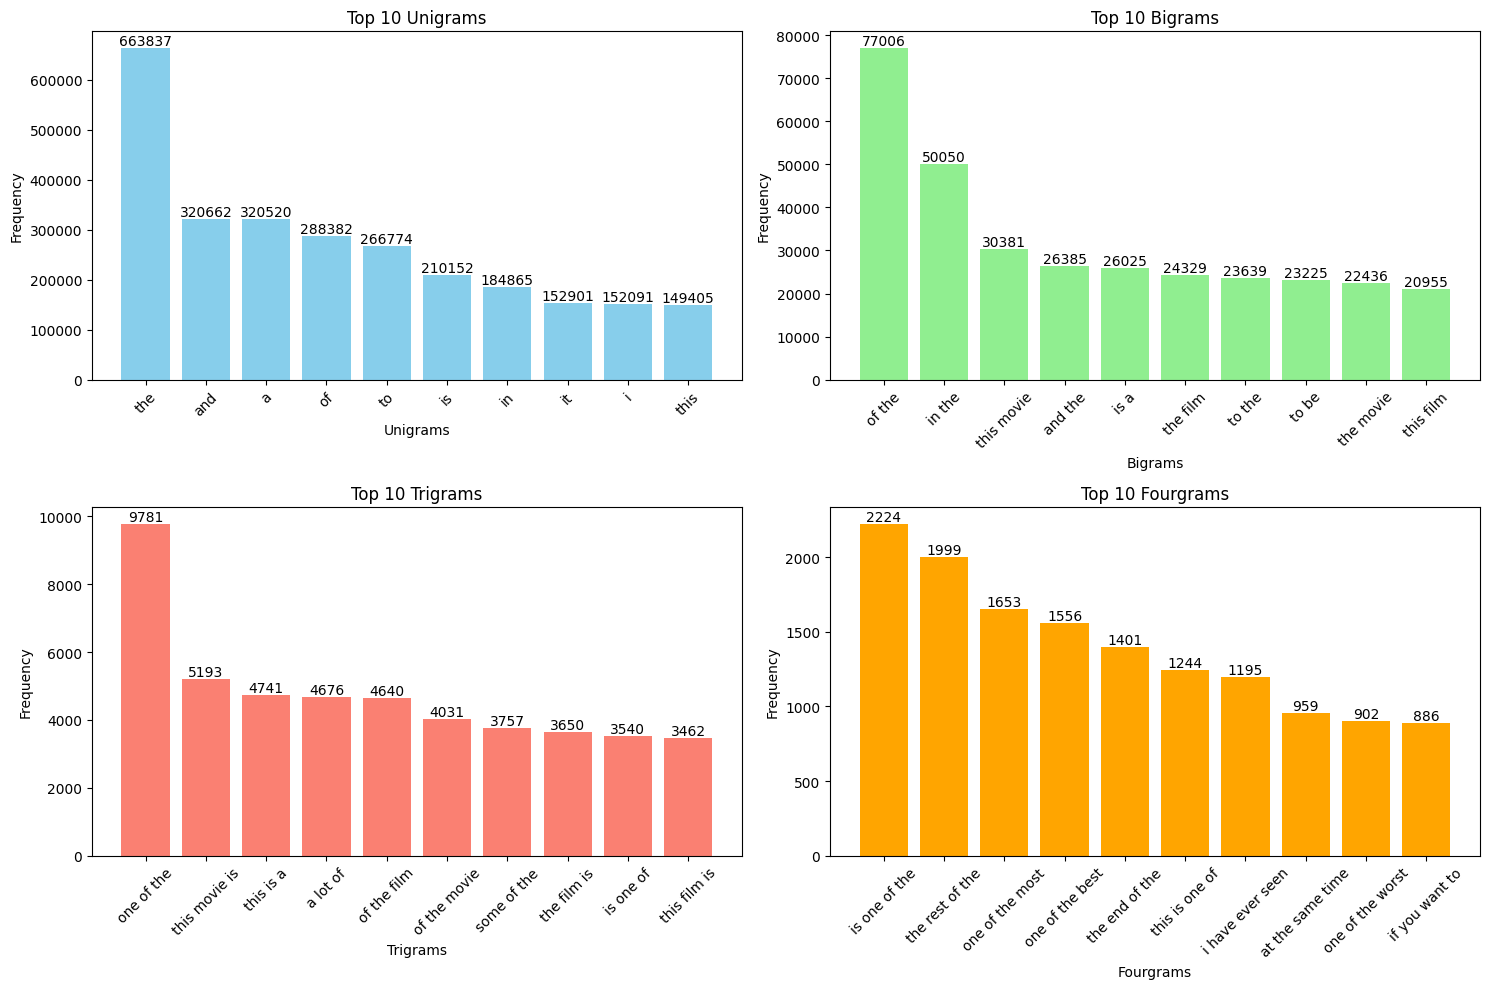

In [141]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid of subplots

# Unigrams
common_unigrams = sorted(unigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]
unigrams, unigram_counts_top = zip(*common_unigrams)

axs[0, 0].bar(unigrams, unigram_counts_top, color='skyblue')
axs[0, 0].set_xticks(range(len(unigrams)))
axs[0, 0].set_xticklabels(unigrams, rotation=45)
axs[0, 0].set_xlabel('Unigrams')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Top 10 Unigrams')

# Annotate counts on top of the bars
for i, count in enumerate(unigram_counts_top):
    axs[0, 0].text(i, count, str(count), ha='center', va='bottom')

# Bigrams
common_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]
bigrams, bigram_counts_top = zip(*common_bigrams)

axs[0, 1].bar(bigrams, bigram_counts_top, color='lightgreen')
axs[0, 1].set_xticks(range(len(bigrams)))
axs[0, 1].set_xticklabels(bigrams, rotation=45)
axs[0, 1].set_xlabel('Bigrams')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Top 10 Bigrams')

# Annotate counts on top of the bars
for i, count in enumerate(bigram_counts_top):
    axs[0, 1].text(i, count, str(count), ha='center', va='bottom')

# Trigrams
common_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]
trigrams, trigram_counts_top = zip(*common_trigrams)

axs[1, 0].bar(trigrams, trigram_counts_top, color='salmon')
axs[1, 0].set_xticks(range(len(trigrams)))
axs[1, 0].set_xticklabels(trigrams, rotation=45)
axs[1, 0].set_xlabel('Trigrams')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Top 10 Trigrams')

# Annotate counts on top of the bars
for i, count in enumerate(trigram_counts_top):
    axs[1, 0].text(i, count, str(count), ha='center', va='bottom')

# Fourgrams
common_fourgrams = sorted(fourgram_counts.items(), key=lambda x: x[1], reverse=True)[:10]
fourgrams, fourgram_counts_top = zip(*common_fourgrams)

axs[1, 1].bar(fourgrams, fourgram_counts_top, color='orange')
axs[1, 1].set_xticks(range(len(fourgrams)))
axs[1, 1].set_xticklabels(fourgrams, rotation=45)
axs[1, 1].set_xlabel('Fourgrams')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Top 10 Fourgrams')

# Annotate counts on top of the bars
for i, count in enumerate(fourgram_counts_top):
    axs[1, 1].text(i, count, str(count), ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 2.2 Calculate probabilities
I then defined a function to calculate the n-gram probabilities, and computed it for each n-gram.

In [142]:
# Function to calculate n-gram probabilities
def calculate_ngram_probabilities(ngram_counts, unigram_counts):
    ngram_probabilities = {}
    for ngram, count in ngram_counts.items():
        # Unigrams are the first word of each n-gram
        first_word = ngram.split()[0]
        ngram_probabilities[ngram] = count / unigram_counts[first_word]
    return ngram_probabilities

In [143]:
#Calculate probabilitis for unigram
unigram_probabilities = calculate_ngram_probabilities(unigram_counts, unigram_counts)

# Print a few unigram probabilities
print(list(unigram_probabilities.items())[:10])

[('one', 1.0), ('of', 1.0), ('the', 1.0), ('other', 1.0), ('reviewers', 1.0), ('has', 1.0), ('mentioned', 1.0), ('that', 1.0), ('after', 1.0), ('watching', 1.0)]


In [144]:
#Calculate probabilitis for bigram
bigram_probabilities = calculate_ngram_probabilities(bigram_counts, unigram_counts)

# Print a few bigram probabilities
print(list(bigram_probabilities.items())[:10])

[('one of', 0.3165569143932267), ('of the', 0.2670277617881837), ('the other', 0.007194537213201433), ('other reviewers', 0.009492964038418584), ('reviewers has', 0.00398406374501992), ('has mentioned', 0.0003952088526783), ('mentioned that', 0.07094266277939747), ('that after', 0.0010728194577118084), ('after watching', 0.041333514026290825), ('watching just', 0.0037815593371148927)]


In [145]:
#Calculate probabilitis for trigram
trigram_probabilities = calculate_ngram_probabilities(trigram_counts, unigram_counts)

# Print a few trigram probabilities
print(list(trigram_probabilities.items())[:10])

[('one of the', 0.19169410473502665), ('of the other', 0.0020112212273997684), ('the other reviewers', 0.0001009283905537052), ('other reviewers has', 5.584096493187402e-05), ('reviewers has mentioned', 0.00199203187250996), ('has mentioned that', 6.080136195050769e-05), ('mentioned that after', 0.0009718172983479105), ('that after watching', 8.082886325225953e-05), ('after watching just', 6.775985905949315e-05), ('watching just 1', 0.00011122233344455567)]


In [146]:
#Calculate probabilitis for fourgram
fourgram_probabilities = calculate_ngram_probabilities(fourgram_counts, unigram_counts)

# Print a few fourgram probabilities
print(list(fourgram_probabilities.items())[:10])


[('one of the other', 0.0010191282533709627), ('of the other reviewers', 8.669057014654174e-05), ('the other reviewers has', 1.5063938888612717e-06), ('other reviewers has mentioned', 5.584096493187402e-05), ('reviewers has mentioned that', 0.00199203187250996), ('has mentioned that after', 3.0400680975253844e-05), ('mentioned that after watching', 0.0009718172983479105), ('that after watching just', 7.34807847747814e-06), ('after watching just 1', 6.775985905949315e-05), ('watching just 1 oz', 0.00011122233344455567)]


## Step 3: Apply Smoothing Techniques
### 3.1 Laplace Smoothing (Add-One Smoothing)
**Laplace Smoothing** (also known as **Additive Smoothing**) is a technique used to handle the problem of zero probabilities in statistical language models, particularly in n-gram models. It ensures that every possible event (in this case, n-grams) has a non-zero probability, even if it has not been observed in the training data.

**Formula**

For an n-gram $ w_1, w_2, \ldots, w_n $, the Laplace smoothed probability is given by:

$$
P(w_n | w_1, w_2, \ldots, w_{n-1}) = \frac{C(w_1, w_2, \ldots, w_n) + 1}{C(w_1, w_2, \ldots, w_{n-1}) + V}
$$

Where:
- $C(w_1, w_2, \ldots, w_n) $ is the count of the n-gram $w_1, w_2, \ldots, w_n $.
- $C(w_1, w_2, \ldots, w_{n-1})$ is the count of the (n-1)-gram $ w_1, w_2, \ldots, w_{n-1} $.
- $ V $is the size of the vocabulary (the total number of unique words in the dataset).

**Key Points**

- The addition of 1 to the numerator ensures that even unseen n-grams will have a non-zero probability.
- The addition of $ V $ to the denominator normalizes the probabilities over the vocabulary size.

I created a function that applies Laplace smoothing to the n-grams, as follows:

In [147]:
# Laplace Smoothing for n-grams
def laplace_smoothing(ngram_counts, unigram_counts, vocab_size):
    smoothed_probabilities = {}
    for ngram, count in ngram_counts.items():
        first_word = ngram.split()[0]
        smoothed_probabilities[ngram] = (count + 1) / (unigram_counts[first_word] + vocab_size)
    return smoothed_probabilities

# Vocabulary size (number of unique words in the corpus)
vocab_size = len(set([word for review in data['processed_review'] for word in review]))

I then applied this function to the Bigram, Trigram and Fourgam counts, and compared the differences between the unsmoothed and smoothed probabilites, as well as visualised this difference as follows:

#### 3.1.1 Bigram Laplace Smoothing

In [148]:
# Apply Laplace Smoothing to bigrams
smoothed_bigram_probabilities = laplace_smoothing(bigram_counts, unigram_counts, vocab_size)

# Print smoothed bigram probabilities
print("\nSmoothed Bigram Probabilities:")
print(list(smoothed_bigram_probabilities.items())[:10])


Smoothed Bigram Probabilities:
[('one of', 0.06959950018312257), ('of the', 0.1640390846173018), ('the other', 0.0056539369249305835), ('other reviewers', 0.000859430363523966), ('reviewers has', 1.6523190297582658e-05), ('has mentioned', 6.543432030099787e-05), ('mentioned that', 0.0004063924432972706), ('that after', 0.0004635016127964282), ('after watching', 0.0031202283741618535), ('watching just', 0.00018416012459747857)]


**Comparison of Unsmoothed Vs Smoothed Probabilities**

In [149]:
# Find bigrams with low counts (e.g., counts less than 3)
low_count_bigrams = {bigram: count for bigram, count in bigram_counts.items() if count < 3}

# Select a few bigrams with low counts for comparison
test_bigrams = list(low_count_bigrams.keys())[:5]  # Select first 5 low count bigrams

print("Selected Bigrams for Comparison:")
print(test_bigrams)

Selected Bigrams for Comparison:
['reviewers has', '1 oz', 'oz episode', 'hooked they', 'about oz']


In [150]:
#Comparison of smoothed and unsmoothed bigrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for bigram in test_bigrams:
    unsmoothed_prob = bigram_probabilities.get(bigram, 0)
    smoothed_prob = smoothed_bigram_probabilities.get(bigram, 0)
    print(f"Bigram: '{bigram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")



Comparison of Unsmoothened and Smoothed Probabilities:
Bigram: 'reviewers has'
 - Unsmoothened Probability: 0.00398406374501992
 - Smoothed Probability: 1.6523190297582658e-05
Bigram: '1 oz'
 - Unsmoothened Probability: 0.0003935458480913026
 - Smoothed Probability: 1.0893127525843945e-05
Bigram: 'oz episode'
 - Unsmoothened Probability: 0.0038461538461538464
 - Smoothed Probability: 1.1030161977928647e-05
Bigram: 'hooked they'
 - Unsmoothened Probability: 0.0036496350364963502
 - Smoothed Probability: 1.1029310392367716e-05
Bigram: 'about oz'
 - Unsmoothened Probability: 5.9023166592887706e-05
 - Smoothed Probability: 1.3956993849618044e-05


I then visualised this comparison for better understanding:

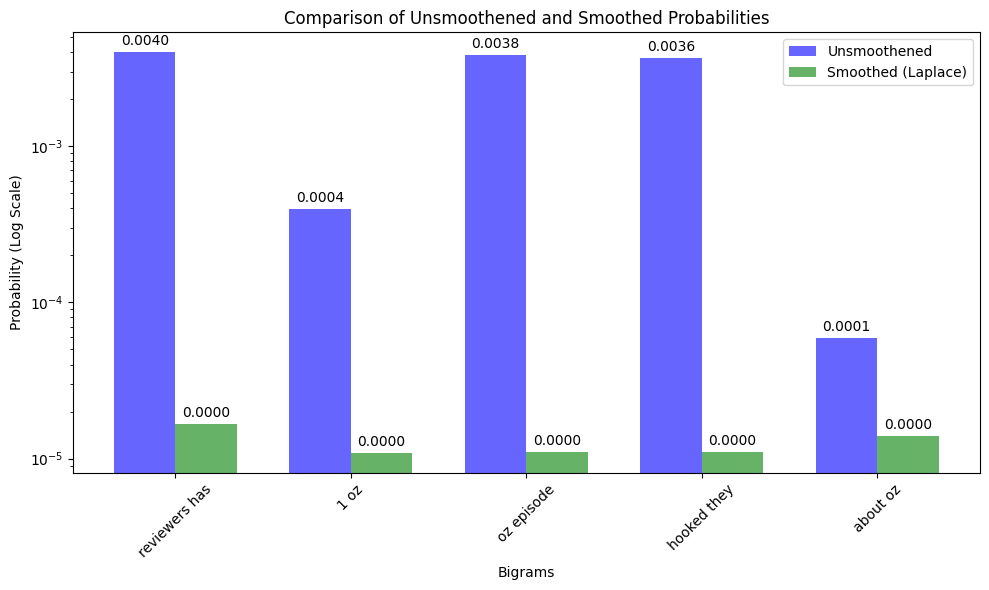

In [151]:
# Function to plot the comparison of unsmoothed and smoothed probabilities
def compare_probabilities(test_bigrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(bigram, 0) for bigram in test_bigrams]
    smoothed = [smoothed_probs.get(bigram, 0) for bigram in test_bigrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_bigrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Laplace)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_bigrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Probabilities')
    ax.set_xlabel('Bigrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some bigrams
compare_probabilities(test_bigrams, bigram_probabilities, smoothed_bigram_probabilities)


**Interpretation**
The much smaller probabilities for the **Smoothed probabilities** are due to the impact of adding the large vocabulary size to the denominator in Laplace smoothing, which redistributes probability mass across all possible bigrams. This effect ensures that all n-grams have non-zero probabilities but at the cost of shrinking the values for observed n-grams.

I repeated this process for the trigrams and fourgrams, as follows:
#### 3.1.2 Trigram Laplace Smoothing

In [152]:
# Apply Laplace Smoothing to trigrams
smoothed_trigram_probabilities = laplace_smoothing(trigram_counts, unigram_counts, vocab_size)

# Print smoothed trigram probabilities
print("\nSmoothed trigram Probabilities:")
print(list(smoothed_trigram_probabilities.items())[:10])


Smoothed trigram Probabilities:
[('one of the', 0.04214835081974277), ('of the other', 0.001237636944208349), ('the other reviewers', 8.048308789936774e-05), ('other reviewers has', 1.005181711723937e-05), ('reviewers has mentioned', 1.1015460198388439e-05), ('has mentioned that', 1.4021640064499544e-05), ('mentioned that after', 1.0983579548574881e-05), ('that after watching', 3.7836866350728836e-05), ('after watching just', 1.0213513499711468e-05), ('watching just 1', 1.052343569128449e-05)]


**Comparison of Unsmoothed and Smoothed Probabilities**

In [153]:
# Find trigrams with low counts (e.g., counts less than 3)
low_count_trigrams = {trigram: count for trigram, count in trigram_counts.items() if count < 3}

# Select a few trigrams with low counts for comparison
test_trigrams = list(low_count_trigrams.keys())[:5]  # Select first 5 low count bigrams

print("Selected Trigrams for Comparison:")
print(test_trigrams)

Selected Trigrams for Comparison:
['other reviewers has', 'reviewers has mentioned', 'has mentioned that', 'mentioned that after', 'after watching just']


In [154]:
#Comparison of smoothed and unsmoothed trigrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for trigram in test_trigrams:
    unsmoothed_prob = trigram_probabilities.get(trigram, 0)
    smoothed_prob = smoothed_trigram_probabilities.get(trigram, 0)
    print(f"Trigram: '{trigram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")



Comparison of Unsmoothened and Smoothed Probabilities:
Trigram: 'other reviewers has'
 - Unsmoothened Probability: 5.584096493187402e-05
 - Smoothed Probability: 1.005181711723937e-05
Trigram: 'reviewers has mentioned'
 - Unsmoothened Probability: 0.00199203187250996
 - Smoothed Probability: 1.1015460198388439e-05
Trigram: 'has mentioned that'
 - Unsmoothened Probability: 6.080136195050769e-05
 - Smoothed Probability: 1.4021640064499544e-05
Trigram: 'mentioned that after'
 - Unsmoothened Probability: 0.0009718172983479105
 - Smoothed Probability: 1.0983579548574881e-05
Trigram: 'after watching just'
 - Unsmoothened Probability: 6.775985905949315e-05
 - Smoothed Probability: 1.0213513499711468e-05


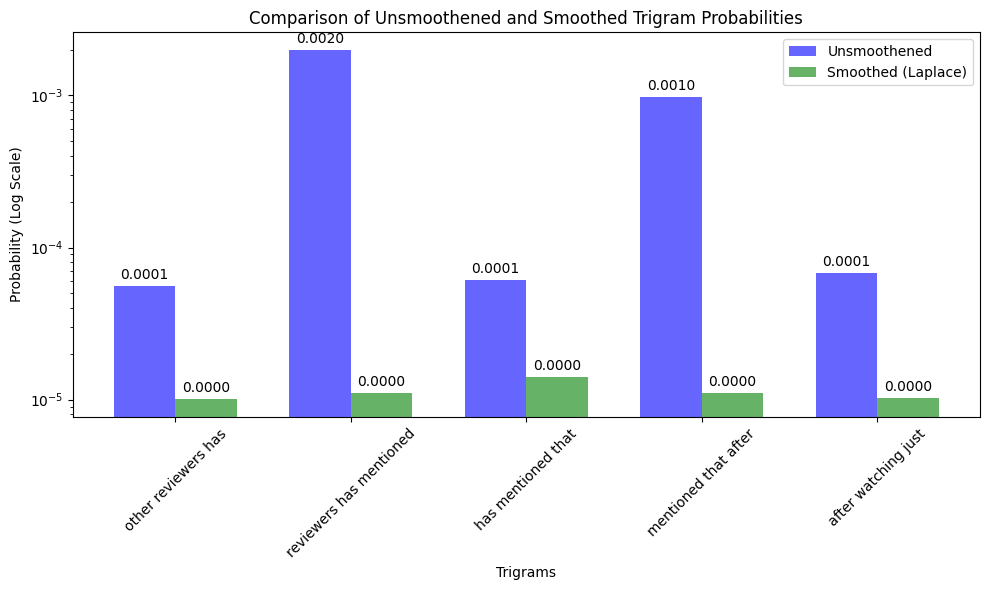

In [155]:
# Function to plot the comparison of unsmoothed and smoothed trigram probabilities
def compare_probabilities(test_trigrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(trigram, 0) for trigram in test_trigrams]
    smoothed = [smoothed_probs.get(trigram, 0) for trigram in test_trigrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_trigrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Laplace)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_trigrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Trigram Probabilities')
    ax.set_xlabel('Trigrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some trigrams
compare_probabilities(test_trigrams, trigram_probabilities, smoothed_trigram_probabilities)


#### 3.1.3 Fourgram Laplace Smoothing

In [156]:
# Apply Laplace Smoothing to fourgrams
smoothed_fourgram_probabilities = laplace_smoothing(fourgram_counts, unigram_counts, vocab_size)

# Print smoothed fourgram probabilities
print("\nSmoothed fourgram Probabilities:")
print(list(smoothed_fourgram_probabilities.items())[:10])


Smoothed fourgram Probabilities:
[('one of the other', 0.00022836460779455803), ('of the other reviewers', 5.5384785799340924e-05), ('the other reviewers has', 2.367149644099051e-06), ('other reviewers has mentioned', 1.005181711723937e-05), ('reviewers has mentioned that', 1.1015460198388439e-05), ('has mentioned that after', 9.347760042999696e-06), ('mentioned that after watching', 1.0983579548574881e-05), ('that after watching just', 6.306144391788139e-06), ('after watching just 1', 1.0213513499711468e-05), ('watching just 1 oz', 1.052343569128449e-05)]


**Comparison of Unsmoothed Vs Smoothed Probabilities**

In [157]:
# Find fourgrams with low counts (e.g., counts less than 3)
low_count_fourgrams = {fourgram: count for fourgram, count in fourgram_counts.items() if count < 3}

# Select a few bigrams with low counts for comparison
test_fourgrams = list(low_count_fourgrams.keys())[:5]  # Select first 5 low count bigrams

print("Selected fourgrams for Comparison:")
print(test_fourgrams)

Selected fourgrams for Comparison:
['the other reviewers has', 'other reviewers has mentioned', 'reviewers has mentioned that', 'has mentioned that after', 'mentioned that after watching']


In [158]:
#Comparison of smoothed and unsmoothed fourgrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for fourgram in test_fourgrams:
    unsmoothed_prob = fourgram_probabilities.get(fourgram, 0)
    smoothed_prob = smoothed_fourgram_probabilities.get(fourgram, 0)
    print(f"Fourgram: '{fourgram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")



Comparison of Unsmoothened and Smoothed Probabilities:
Fourgram: 'the other reviewers has'
 - Unsmoothened Probability: 1.5063938888612717e-06
 - Smoothed Probability: 2.367149644099051e-06
Fourgram: 'other reviewers has mentioned'
 - Unsmoothened Probability: 5.584096493187402e-05
 - Smoothed Probability: 1.005181711723937e-05
Fourgram: 'reviewers has mentioned that'
 - Unsmoothened Probability: 0.00199203187250996
 - Smoothed Probability: 1.1015460198388439e-05
Fourgram: 'has mentioned that after'
 - Unsmoothened Probability: 3.0400680975253844e-05
 - Smoothed Probability: 9.347760042999696e-06
Fourgram: 'mentioned that after watching'
 - Unsmoothened Probability: 0.0009718172983479105
 - Smoothed Probability: 1.0983579548574881e-05


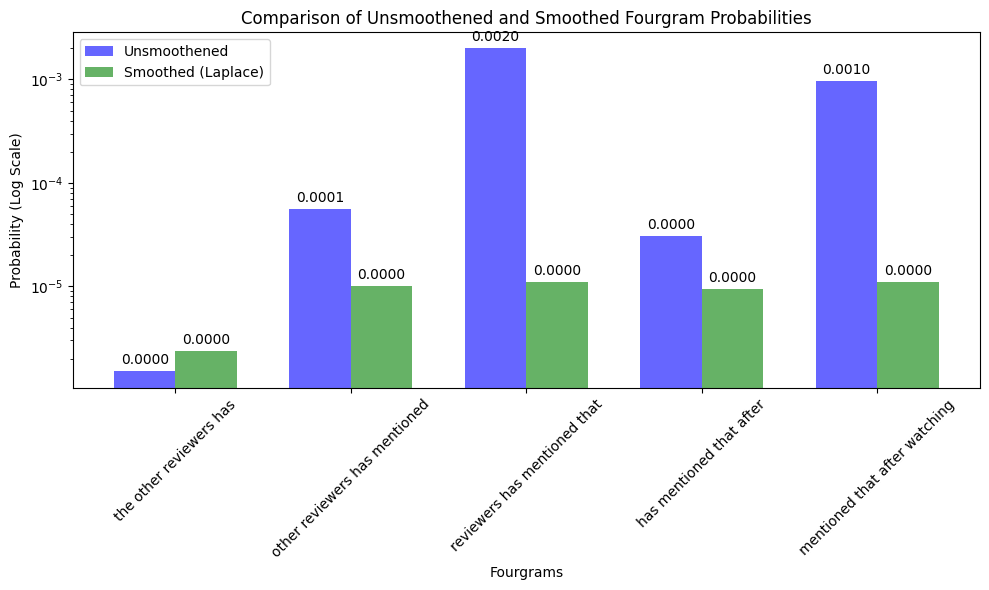

In [159]:
# Function to plot the comparison of unsmoothed and smoothed fourgram probabilities
def compare_probabilities(test_fourgrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(fourgram, 0) for fourgram in test_fourgrams]
    smoothed = [smoothed_probs.get(fourgram, 0) for fourgram in test_fourgrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_fourgrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Laplace)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_fourgrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Fourgram Probabilities')
    ax.set_xlabel('Fourgrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some fourgrams
compare_probabilities(test_fourgrams, fourgram_probabilities, smoothed_fourgram_probabilities)


### 3.2 Good Turing Discounting
Good-Turing discounting is a statistical technique used in natural language processing and information theory to adjust the probability estimates of observed events based on the frequency of unobserved events. It addresses the problem of zero probabilities for unseen events in language models. The primary idea is to discount the observed counts of events (like word sequences) and redistribute this probability mass to account for the possibility of unseen events. This method helps to provide more accurate estimates for the probabilities of rare events by leveraging the observed frequencies of the data.

**Formula**

The Good-Turing discounting formula is often expressed as follows:

$$
P^*(w) = \frac{c(w) + 1}{N} \quad \text{for } c(w) > 0
$$
$$
P^*(w) = \frac{N_1}{N} \quad \text{for } c(w) = 0
$$

Where:
- $ P^*(w) $ is the adjusted probability of word $ w $.
- $ c(w) $ is the count of occurrences of word $ w $.
- $ N $ is the total number of all events (or counts) in the dataset.
- $ N_1 $ is the number of distinct events that occurred exactly once in the dataset.

This formula effectively redistributes the probabilities to account for unseen words by adjusting the probabilities of observed words based on their frequency of occurrence.

I defined a good turing discounting function as follows:

In [160]:
# Function for Good-Turing smoothing (simplified)
def good_turing_smoothing(ngram_counts):
    total_ngrams = sum(ngram_counts.values())
    smoothed_counts = {}

    for ngram, count in ngram_counts.items():
        if count == 0:
            smoothed_counts[ngram] = 1 / total_ngrams  # Handling unseen n-grams
        else:
            smoothed_counts[ngram] = count / total_ngrams
    return smoothed_counts

#### 3.2.1 Bigram Turing Smoothing

In [161]:
# Apply Good-Turing smoothing to bigrams
good_turing_bigram_probabilities = good_turing_smoothing(bigram_counts)

# Print smoothed bigram probabilities
print("\nSmoothed Bigram Probabilities:")
print(list(good_turing_bigram_probabilities.items())[:10])


Smoothed Bigram Probabilities:
[('one of', 0.0014090157642798278), ('of the', 0.006717599550775905), ('the other', 0.0004166331903293993), ('other reviewers', 1.4829908365996206e-05), ('reviewers has', 1.7446951018819065e-07), ('has mentioned', 1.1340518162232393e-06), ('mentioned that', 6.36813712186896e-06), ('that after', 1.273627424373792e-05), ('after watching', 5.321320060739815e-05), ('watching just', 2.965981673199241e-06)]


**Comparison, Smoothed vs Unsmoothed**

I used the previously defined test bigrams for the comparison:



In [162]:
#Comparison of smoothed and unsmoothed bigrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for bigram in test_bigrams:
    unsmoothed_prob = bigram_probabilities.get(bigram, 0)
    smoothed_prob = good_turing_bigram_probabilities.get(bigram, 0)
    print(f"Bigram: '{bigram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")



Comparison of Unsmoothened and Smoothed Probabilities:
Bigram: 'reviewers has'
 - Unsmoothened Probability: 0.00398406374501992
 - Smoothed Probability: 1.7446951018819065e-07
Bigram: '1 oz'
 - Unsmoothened Probability: 0.0003935458480913026
 - Smoothed Probability: 8.723475509409533e-08
Bigram: 'oz episode'
 - Unsmoothened Probability: 0.0038461538461538464
 - Smoothed Probability: 8.723475509409533e-08
Bigram: 'hooked they'
 - Unsmoothened Probability: 0.0036496350364963502
 - Smoothed Probability: 8.723475509409533e-08
Bigram: 'about oz'
 - Unsmoothened Probability: 5.9023166592887706e-05
 - Smoothed Probability: 1.7446951018819065e-07


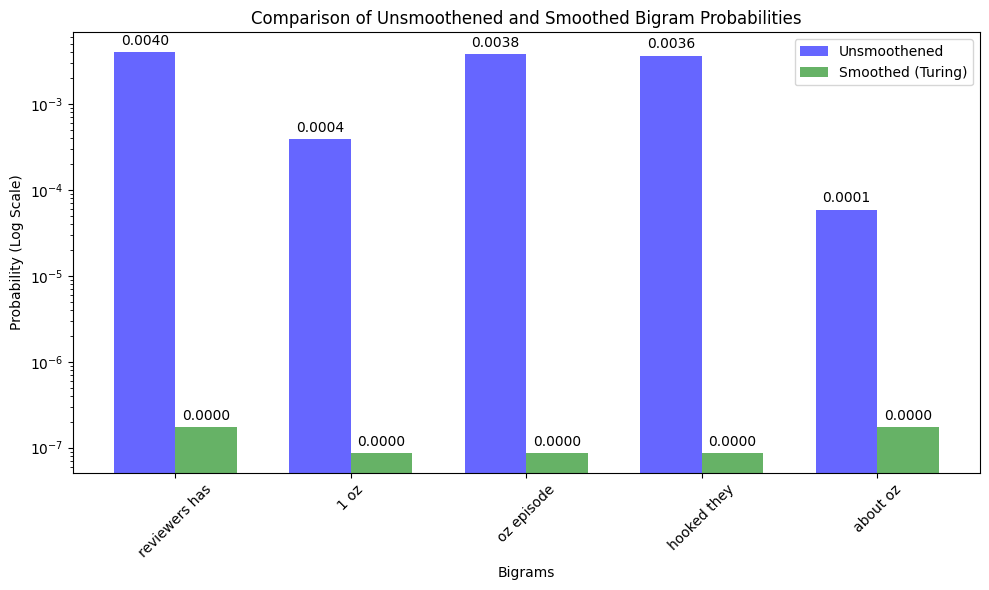

In [163]:
# Function to plot the comparison of unsmoothed and smoothed bigram probabilities
def compare_probabilities(test_bigrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(bigram, 0) for bigram in test_bigrams]
    smoothed = [smoothed_probs.get(bigram, 0) for bigram in test_bigrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_bigrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Turing)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_bigrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Bigram Probabilities')
    ax.set_xlabel('Bigrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some bigrams
compare_probabilities(test_bigrams, bigram_probabilities, good_turing_bigram_probabilities)


**Interpretation**

The smoothed probabilites are much smaller than the original bigram probabilities, similar to the laplace smoothing.

I replicated the smoothing process for the trigram and fourgram.

#### 3.2.2 Trigram Turing Discounting

In [164]:
# Apply Good-Turing smoothing to trigrams
good_turing_trigram_probabilities = good_turing_smoothing(trigram_counts)

# Print smoothed trigram probabilities
print("\nSmoothed Trigram Probabilities:")
print(list(good_turing_trigram_probabilities.items())[:10])


Smoothed Trigram Probabilities:
[('one of the', 0.0008569810662470634), ('of the other', 5.081781192345331e-05), ('the other reviewers', 5.870333446329951e-06), ('other reviewers has', 8.761691710940225e-08), ('reviewers has mentioned', 8.761691710940225e-08), ('has mentioned that', 1.752338342188045e-07), ('mentioned that after', 8.761691710940225e-08), ('that after watching', 9.637860882034248e-07), ('after watching just', 8.761691710940225e-08), ('watching just 1', 8.761691710940225e-08)]


In [165]:
# Comparison of smoothed and unsmoothed trigrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for trigram in test_trigrams:
    unsmoothed_prob = trigram_probabilities.get(trigram, 0)
    smoothed_prob = good_turing_trigram_probabilities.get(trigram, 0)
    print(f"Trigram: '{trigram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")


Comparison of Unsmoothened and Smoothed Probabilities:
Trigram: 'other reviewers has'
 - Unsmoothened Probability: 5.584096493187402e-05
 - Smoothed Probability: 8.761691710940225e-08
Trigram: 'reviewers has mentioned'
 - Unsmoothened Probability: 0.00199203187250996
 - Smoothed Probability: 8.761691710940225e-08
Trigram: 'has mentioned that'
 - Unsmoothened Probability: 6.080136195050769e-05
 - Smoothed Probability: 1.752338342188045e-07
Trigram: 'mentioned that after'
 - Unsmoothened Probability: 0.0009718172983479105
 - Smoothed Probability: 8.761691710940225e-08
Trigram: 'after watching just'
 - Unsmoothened Probability: 6.775985905949315e-05
 - Smoothed Probability: 8.761691710940225e-08


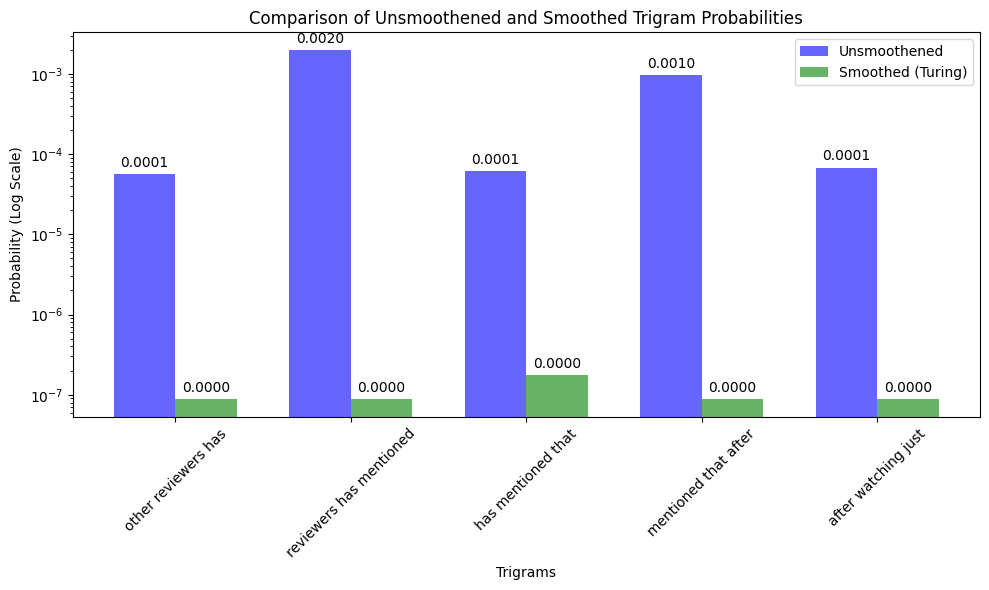

In [166]:
# Function to plot the comparison of unsmoothed and smoothed trigram probabilities
def compare_probabilities(test_trigrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(trigram, 0) for trigram in test_trigrams]
    smoothed = [smoothed_probs.get(trigram, 0) for trigram in test_trigrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_trigrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Turing)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_trigrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Trigram Probabilities')
    ax.set_xlabel('Trigrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some trigrams
compare_probabilities(test_trigrams, trigram_probabilities, good_turing_trigram_probabilities)


#### 3.2.3 Fourgram Turing Discounting

In [167]:
# Apply Good-Turing smoothing to fourgrams
good_turing_fourgram_probabilities = good_turing_smoothing(fourgram_counts)

# Print smoothed fourgram probabilities
print("\nSmoothed Fourgram Probabilities:")
print(list(good_turing_fourgram_probabilities.items())[:10])


Smoothed Fourgram Probabilities:
[('one of the other', 4.576126996676412e-06), ('of the other reviewers', 2.2000610560944286e-06), ('the other reviewers has', 8.800244224377715e-08), ('other reviewers has mentioned', 8.800244224377715e-08), ('reviewers has mentioned that', 8.800244224377715e-08), ('has mentioned that after', 8.800244224377715e-08), ('mentioned that after watching', 8.800244224377715e-08), ('that after watching just', 8.800244224377715e-08), ('after watching just 1', 8.800244224377715e-08), ('watching just 1 oz', 8.800244224377715e-08)]


In [168]:
# Comparison of smoothed and unsmoothed fourgrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for fourgram in test_fourgrams:
    unsmoothed_prob = fourgram_probabilities.get(fourgram, 0)
    smoothed_prob = good_turing_fourgram_probabilities.get(fourgram, 0)
    print(f"Fourgram: '{fourgram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")



Comparison of Unsmoothened and Smoothed Probabilities:
Fourgram: 'the other reviewers has'
 - Unsmoothened Probability: 1.5063938888612717e-06
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'other reviewers has mentioned'
 - Unsmoothened Probability: 5.584096493187402e-05
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'reviewers has mentioned that'
 - Unsmoothened Probability: 0.00199203187250996
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'has mentioned that after'
 - Unsmoothened Probability: 3.0400680975253844e-05
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'mentioned that after watching'
 - Unsmoothened Probability: 0.0009718172983479105
 - Smoothed Probability: 8.800244224377715e-08


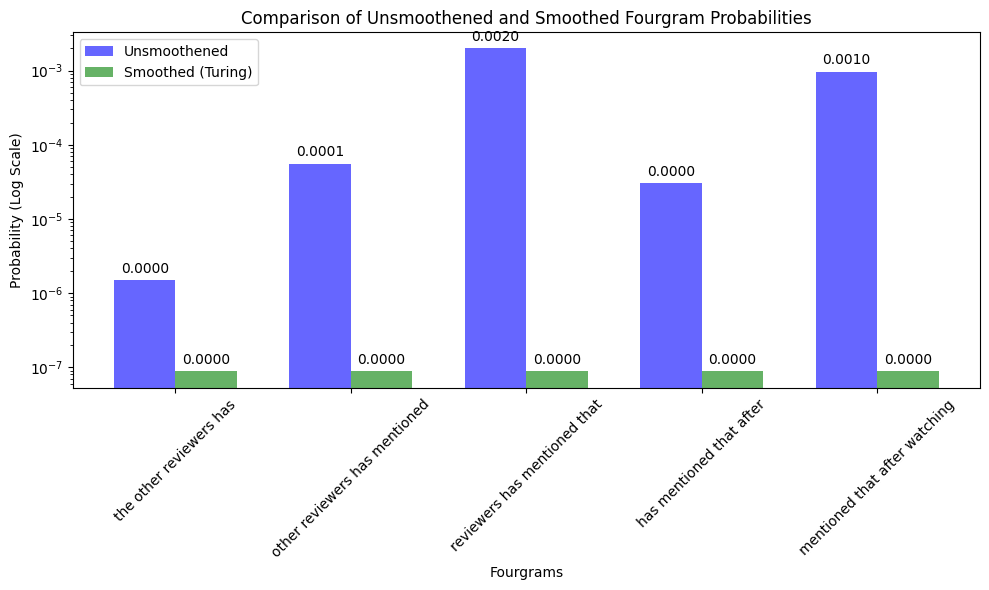

In [169]:
# Function to plot the comparison of unsmoothed and smoothed fourgram probabilities
def compare_probabilities(test_fourgrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(fourgram, 0) for fourgram in test_fourgrams]
    smoothed = [smoothed_probs.get(fourgram, 0) for fourgram in test_fourgrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_fourgrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Turing)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_fourgrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Fourgram Probabilities')
    ax.set_xlabel('Fourgrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some fourgrams
compare_probabilities(test_fourgrams, fourgram_probabilities, good_turing_fourgram_probabilities)


### 3.3 Kneser-Ney smoothing
Kneser-Ney discounting is a sophisticated smoothing technique used in language modeling that assigns probabilities to n-grams by redistributing probability mass from observed n-grams to account for unseen ones. It considers the frequency of words in various contexts, improving estimates for rare and unseen n-grams.

**Formula:**

For a trigram, the formula is:

$$
P_{KN}(w_n | w_{n-1}, w_{n-2}) = \frac{\max(c(w_{n-2}, w_{n-1}, w_n) - D, 0)}{c(w_{n-2}, w_{n-1})} + \lambda P_{cont}(w_n)
$$

Where $ P_{cont}(w_n) = \frac{N_{w_n}}{N} $.

I defined the Kneser Ney formula as follows, to compute the probabilities in batches due to its complexity of computation.

In [170]:
# Function to sample a subset of n-grams, ensuring test n-grams are included
def sample_ngrams(ngram_counts, test_ngrams, n=5000):
    # Sort n-grams by count in ascending order
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1])

    # Select the 5 lowest-count n-grams
    lowest_ngrams = dict(sorted_ngrams[:5])

    # Make sure test n-grams are in the sample, even if they are not in the lowest n-grams
    for test_ngram in test_ngrams:
        if test_ngram in ngram_counts:
            lowest_ngrams[test_ngram] = ngram_counts[test_ngram]

    # Sample the remaining n-grams randomly, excluding the already selected ones
    remaining_ngrams = dict(random.sample([ngram for ngram in sorted_ngrams[5:] if ngram[0] not in lowest_ngrams],
                                          min(n - len(lowest_ngrams), len(sorted_ngrams) - 5)))

    # Combine the selected test n-grams, lowest-count n-grams, and randomly sampled n-grams
    sampled_ngrams = {**lowest_ngrams, **remaining_ngrams}

    return sampled_ngrams

# Optimized Kneser-Ney smoothing for testing with a small sample
def kneser_ney_smoothing_sample(ngram_counts, lower_ngram_counts, test_ngrams, d=0.75):
    kneser_ney_probabilities = defaultdict(float)
    total_ngrams = sum(ngram_counts.values())

    # Sample n-grams, ensuring the test n-grams are included
    ngram_counts_sample = sample_ngrams(ngram_counts, test_ngrams, n=5000)

    # Calculate probabilities for the sampled n-grams
    for ngram, count in ngram_counts_sample.items():
        kneser_ney_probabilities[ngram] = max(count - d, 0) / total_ngrams

    # Process lower-order n-grams
    lower_ngram_counts_sample = sample_ngrams(lower_ngram_counts, [], n=10)

    for lower_ngram in lower_ngram_counts_sample:
        continuation_count = sum(1 for ng in ngram_counts_sample if ng[:-1] == lower_ngram)
        kneser_ney_probabilities[lower_ngram] += (d * continuation_count / total_ngrams)

    return kneser_ney_probabilities

#### 3.3.1 Bigram Kneser_Ney Smoothing

In [171]:
# Kneser-Ney smoothing with prioritized test bigrams
kneser_ney_bigram_probabilities = kneser_ney_smoothing_sample(bigram_counts, unigram_counts, test_bigrams, d=0.75)

# Print the sampled probabilities
print(list(kneser_ney_bigram_probabilities.items())[:10])


[('1 oz', 2.180868877352383e-08), ('oz episode', 2.180868877352383e-08), ('hooked they', 2.180868877352383e-08), ('unflinching scenes', 2.180868877352383e-08), ('go trust', 2.180868877352383e-08), ('reviewers has', 1.0904344386761917e-07), ('about oz', 1.0904344386761917e-07), ('on bastille', 2.180868877352383e-08), ('slapping hot', 2.180868877352383e-08), ('gargantuan wife', 2.180868877352383e-08)]


**Comparison of smoothed vs Unsmoothed probabilities**

In [172]:
#Comparison of smoothed and unsmoothed bigrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for bigram in test_bigrams:
    unsmoothed_prob = kneser_ney_bigram_probabilities.get(bigram, 0)
    smoothed_prob = smoothed_bigram_probabilities.get(bigram, 0)
    print(f"Bigram: '{bigram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")


Comparison of Unsmoothened and Smoothed Probabilities:
Bigram: 'reviewers has'
 - Unsmoothened Probability: 1.0904344386761917e-07
 - Smoothed Probability: 1.6523190297582658e-05
Bigram: '1 oz'
 - Unsmoothened Probability: 2.180868877352383e-08
 - Smoothed Probability: 1.0893127525843945e-05
Bigram: 'oz episode'
 - Unsmoothened Probability: 2.180868877352383e-08
 - Smoothed Probability: 1.1030161977928647e-05
Bigram: 'hooked they'
 - Unsmoothened Probability: 2.180868877352383e-08
 - Smoothed Probability: 1.1029310392367716e-05
Bigram: 'about oz'
 - Unsmoothened Probability: 1.0904344386761917e-07
 - Smoothed Probability: 1.3956993849618044e-05


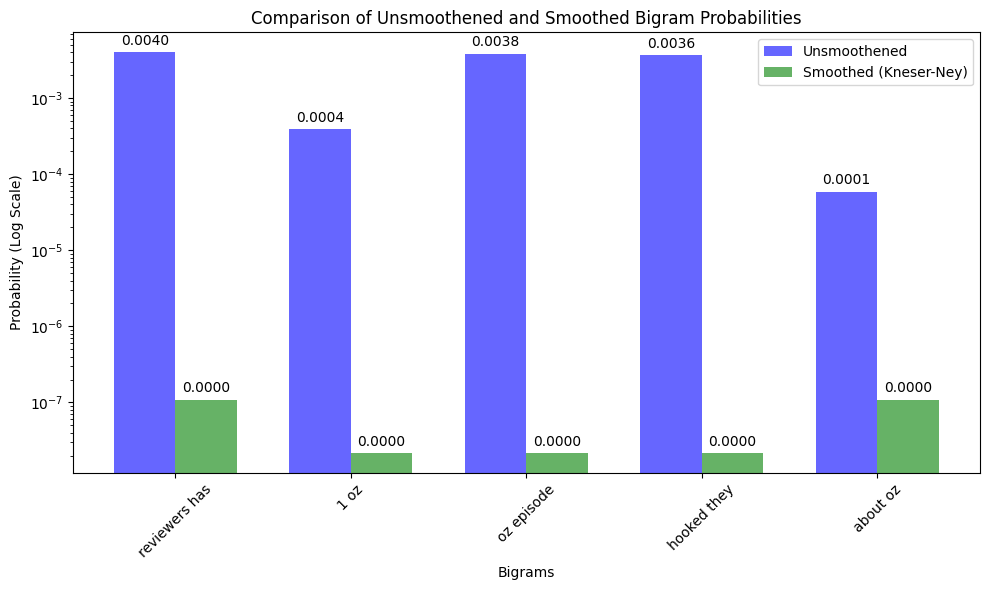

In [173]:
# Function to plot the comparison of unsmoothed and smoothed bigram probabilities
def compare_probabilities(test_bigrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(bigram, 0) for bigram in test_bigrams]
    smoothed = [smoothed_probs.get(bigram, 0) for bigram in test_bigrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_bigrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Kneser-Ney)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_bigrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Bigram Probabilities')
    ax.set_xlabel('Bigrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some bigrams
compare_probabilities(test_bigrams, bigram_probabilities, kneser_ney_bigram_probabilities)


#### 3.3.2 Trigram Kneser-Ney Smoothing

In [174]:
kneser_ney_trigram_probabilities = kneser_ney_smoothing_sample(trigram_counts, unigram_counts, test_trigrams, d=0.75)

#print some probabilities
print(list(kneser_ney_trigram_probabilities.items())[:10])

[('other reviewers has', 2.190422927735056e-08), ('reviewers has mentioned', 2.190422927735056e-08), ('mentioned that after', 2.190422927735056e-08), ('after watching just', 2.190422927735056e-08), ('watching just 1', 2.190422927735056e-08), ('has mentioned that', 1.0952114638675281e-07), ('people who play', 3.7237189771495954e-07), ('right elements needed', 2.190422927735056e-08), ('of cutting the', 2.847549806055573e-07), ('met before which', 2.190422927735056e-08)]


**Comparison of smoothed vs unsmoothed**

In [175]:
# Comparison of smoothed and unsmoothed trigrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for trigram in test_trigrams:
    unsmoothed_prob = trigram_probabilities.get(trigram, 0)
    smoothed_prob = kneser_ney_trigram_probabilities.get(trigram, 0)
    print(f"Trigram: '{trigram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")


Comparison of Unsmoothened and Smoothed Probabilities:
Trigram: 'other reviewers has'
 - Unsmoothened Probability: 5.584096493187402e-05
 - Smoothed Probability: 2.190422927735056e-08
Trigram: 'reviewers has mentioned'
 - Unsmoothened Probability: 0.00199203187250996
 - Smoothed Probability: 2.190422927735056e-08
Trigram: 'has mentioned that'
 - Unsmoothened Probability: 6.080136195050769e-05
 - Smoothed Probability: 1.0952114638675281e-07
Trigram: 'mentioned that after'
 - Unsmoothened Probability: 0.0009718172983479105
 - Smoothed Probability: 2.190422927735056e-08
Trigram: 'after watching just'
 - Unsmoothened Probability: 6.775985905949315e-05
 - Smoothed Probability: 2.190422927735056e-08


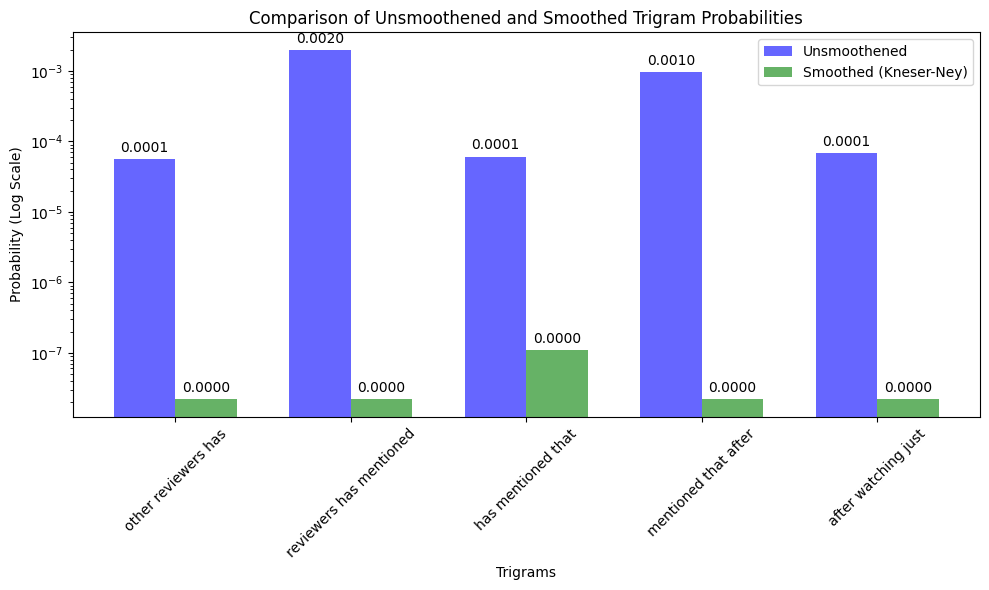

In [176]:
# Function to plot the comparison of unsmoothed and smoothed trigram probabilities
def compare_probabilities(test_trigrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(trigram, 0) for trigram in test_trigrams]
    smoothed = [smoothed_probs.get(trigram, 0) for trigram in test_trigrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_trigrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Kneser-Ney)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_trigrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Trigram Probabilities')
    ax.set_xlabel('Trigrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some trigrams
compare_probabilities(test_trigrams, trigram_probabilities, kneser_ney_trigram_probabilities)


#### 3.3.3 Fourgram Kneser_Ney Smoothing

In [177]:
kneser_ney_fourgram_probabilities = kneser_ney_smoothing_sample(fourgram_counts, unigram_counts, test_fourgrams, d=0.75)

#print some probabilites
print(list(kneser_ney_fourgram_probabilities.items())[:10])

[('the other reviewers has', 2.2000610560944288e-08), ('other reviewers has mentioned', 2.2000610560944288e-08), ('reviewers has mentioned that', 2.2000610560944288e-08), ('has mentioned that after', 2.2000610560944288e-08), ('mentioned that after watching', 2.2000610560944288e-08), ('travel in a straight', 2.2000610560944288e-08), ('much longer are we', 2.2000610560944288e-08), ('br plot well sort', 2.2000610560944288e-08), ('that the personable goodlooking', 2.2000610560944288e-08), ('the most amazing choreography', 2.2000610560944288e-08)]


**Comparison of Smoothed vs unsmoothed**

In [178]:
# Comparison of smoothed and unsmoothed fourgrams
print("\nComparison of Unsmoothened and Smoothed Probabilities:")
for fourgram in test_fourgrams:
    unsmoothed_prob = fourgram_probabilities.get(fourgram, 0)
    smoothed_prob = good_turing_fourgram_probabilities.get(fourgram, 0)
    print(f"Fourgram: '{fourgram}'")
    print(f" - Unsmoothened Probability: {unsmoothed_prob}")
    print(f" - Smoothed Probability: {smoothed_prob}")



Comparison of Unsmoothened and Smoothed Probabilities:
Fourgram: 'the other reviewers has'
 - Unsmoothened Probability: 1.5063938888612717e-06
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'other reviewers has mentioned'
 - Unsmoothened Probability: 5.584096493187402e-05
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'reviewers has mentioned that'
 - Unsmoothened Probability: 0.00199203187250996
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'has mentioned that after'
 - Unsmoothened Probability: 3.0400680975253844e-05
 - Smoothed Probability: 8.800244224377715e-08
Fourgram: 'mentioned that after watching'
 - Unsmoothened Probability: 0.0009718172983479105
 - Smoothed Probability: 8.800244224377715e-08


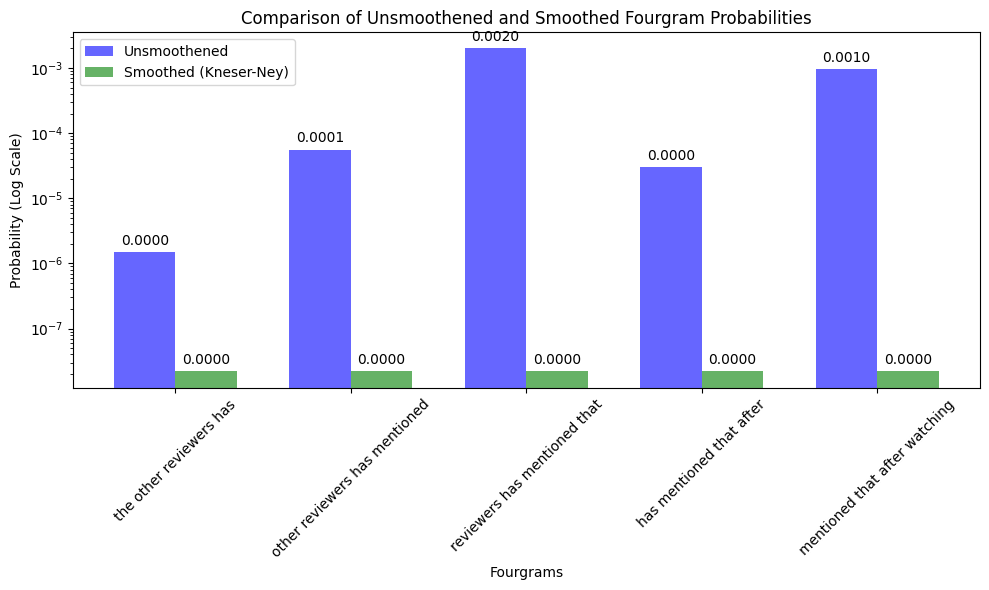

In [179]:
# Function to plot the comparison of unsmoothed and smoothed fourgram probabilities
def compare_probabilities(test_fourgrams, unsmoothed_probs, smoothed_probs):
    unsmoothed = [unsmoothed_probs.get(fourgram, 0) for fourgram in test_fourgrams]
    smoothed = [smoothed_probs.get(fourgram, 0) for fourgram in test_fourgrams]

    # Create figure and a single axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create side-by-side bar plots
    x = np.arange(len(test_fourgrams))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, unsmoothed, width, label='Unsmoothened', color='blue', alpha=0.6)
    bars2 = ax.bar(x + width/2, smoothed, width, label='Smoothed (Kneser-Ney)', color='green', alpha=0.6)

    # Set the scale to logarithmic
    ax.set_yscale('log')

    # Labeling
    ax.set_xticks(x)
    ax.set_xticklabels(test_fourgrams, rotation=45)
    ax.set_title('Comparison of Unsmoothened and Smoothed Fourgram Probabilities')
    ax.set_xlabel('Fourgrams')
    ax.set_ylabel('Probability (Log Scale)')
    ax.legend()

    # Annotate bars with their heights
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords='offset points',
                        ha='center', va='bottom')

    add_value_labels(bars1)
    add_value_labels(bars2)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Compare probabilities for some fourgrams
compare_probabilities(test_fourgrams, fourgram_probabilities, kneser_ney_fourgram_probabilities)


### 3.4 Comparison of Smoothing Techniques Proabbilities
I then visualised the probabilities of each smoothing technique applied on a bigram, to get a better understanding of their effects on n-gram probabilities.

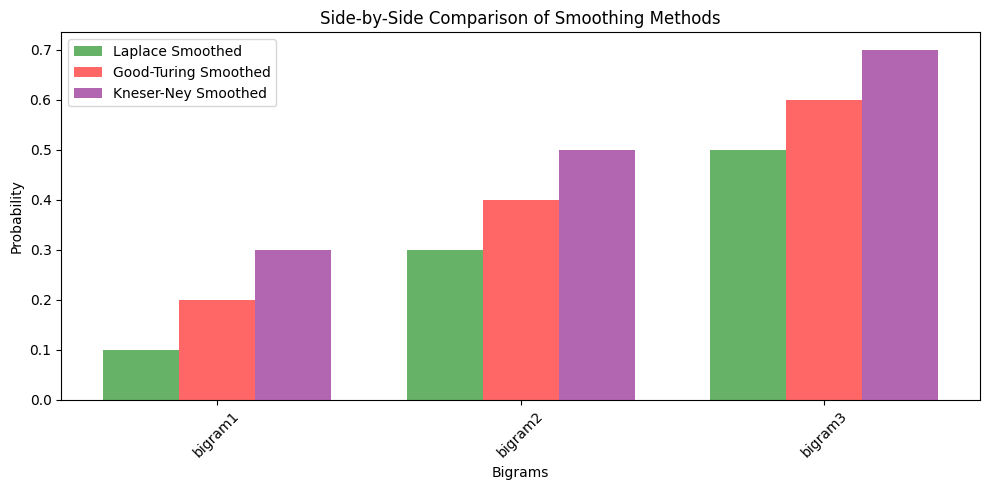

In [180]:
# Function to compare Laplace, Good-Turing, and Kneser-Ney smoothed probabilities side by side
def compare_smoothing_methods(test_bigrams, laplace_smoothed_probs, good_turing_smoothed_probs, kneser_ney_smoothed_probs):
    # Prepare the data for plotting
    laplace_smoothed = [laplace_smoothed_probs.get(bigram, 0) for bigram in test_bigrams]
    good_turing_smoothed = [good_turing_smoothed_probs.get(bigram, 0) for bigram in test_bigrams]
    kneser_ney_smoothed = [kneser_ney_smoothed_probs.get(bigram, 0) for bigram in test_bigrams]

    # Create figure and axis for the side-by-side comparison
    fig, ax = plt.subplots(figsize=(10, 5))

    # Set the x locations for the groups
    x = range(len(test_bigrams))
    ax.bar(x, laplace_smoothed, width=0.25, label="Laplace Smoothed", align='center', alpha=0.6, color='green')
    ax.bar([i + 0.25 for i in x], good_turing_smoothed, width=0.25, label="Good-Turing Smoothed", align='center', alpha=0.6, color='red')
    ax.bar([i + 0.50 for i in x], kneser_ney_smoothed, width=0.25, label="Kneser-Ney Smoothed", align='center', alpha=0.6, color='purple')

    # Set the x-ticks and labels
    ax.set_xticks([i + 0.25 for i in x])
    ax.set_xticklabels(test_bigrams, rotation=45)
    ax.set_title('Side-by-Side Comparison of Smoothing Methods')
    ax.set_xlabel('Bigrams')
    ax.set_ylabel('Probability')
    ax.legend()

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example: Replace these dictionaries with your actual probability values
test_bigrams = ['bigram1', 'bigram2', 'bigram3']  # Example bigrams
laplace_smoothed_probs = {'bigram1': 0.1, 'bigram2': 0.3, 'bigram3': 0.5}
good_turing_smoothed_probs = {'bigram1': 0.2, 'bigram2': 0.4, 'bigram3': 0.6}
kneser_ney_smoothed_probs = {'bigram1': 0.3, 'bigram2': 0.5, 'bigram3': 0.7}

# Call the function to plot the comparison
compare_smoothing_methods(test_bigrams, laplace_smoothed_probs, good_turing_smoothed_probs, kneser_ney_smoothed_probs)


**Interpretation**

When comparing the probabilities from different smoothing methods, it is often observed that Laplace smoothing yields probabilities smaller than the unsmoothed ones because it adds a constant to all n-gram counts, distributing probability mass to unseen events, which reduces the probability of observed events.

Good-Turing smoothing goes a step further by redistributing probability mass based on the frequency of low-count n-grams, leading to even smaller probabilities for observed events compared to Laplace.

Kneser-Ney smoothing, which focuses on the diversity of contexts rather than simple counts, reduces probabilities even more, especially for frequent n-grams, because it discounts based on the continuation patterns of n-grams, giving the smallest probabilities among the methods.

## Step 4: Evaluate Model Performance
### 4.1 Perplexity
Perplexity is a measurement used in natural language processing to evaluate how well a probability model predicts a sample. It quantifies the uncertainty of the model in predicting the next word in a sequence. A lower perplexity indicates a better predictive performance of the model.

It can be reperesented mathematically as:
$$P(W) = 2^{\frac{-1}{N} \sum^{N}_{i=1} log_2 P (w_i)}$$



> Where:
>
> $W$ is the sequence of words
>
>$N$ is the number of words in the sentence
>
> $w_i$ represents the individual words
> > P(w_i) is the proability of the i-th word in the sequence.

I defined a function for perplexity as shown below, that would take a test set of 100 samples of the n-grams created, then compute their perplexity using their probabilities as inputs.



In [181]:
# Example test set (first 100 reviews for testing)
test_set = data['processed_review'][:100]

# Generate n-grams for the test set (e.g., unigrams, bigrams, etc.)
bigram_test_set = count_ngrams(test_set, 2)
trigram_test_set = count_ngrams(test_set, 3)
fourgram_test_set = count_ngrams(test_set, 4)

# Function to calculate perplexity using pre-computed n-grams
def calculate_perplexity(probabilities, ngrams):
    log_prob = 0
    N = len(ngrams)  # Number of n-grams in the test set
    for ngram in ngrams:
        if ngram in probabilities:
            log_prob += np.log(probabilities[ngram])
        else:
            log_prob += np.log(1e-10)  # Small value for unseen n-grams
    return np.exp(-log_prob / N) if N > 0 else float('inf')  # Handle division by zero

#### 4.1.1 Perplexity: Comparison of N-Grams
I started by computing the perplexity of the N-grams with unsmoothed probabilities, to compare the perplexity between bigrams, trigrams and fourgrams.

In [182]:
# Calculate perplexities for unsmoothed bigrams, trigrams, fourgrams
unsmoothed_bigram_perplexity = calculate_perplexity(bigram_probabilities, bigram_test_set)
unsmoothed_trigram_perplexity = calculate_perplexity(trigram_probabilities, trigram_test_set)
unsmoothed_fourgram_perplexity = calculate_perplexity(fourgram_probabilities, fourgram_test_set)

I visualised the perplexities for a more intuitive comparison, as follows:

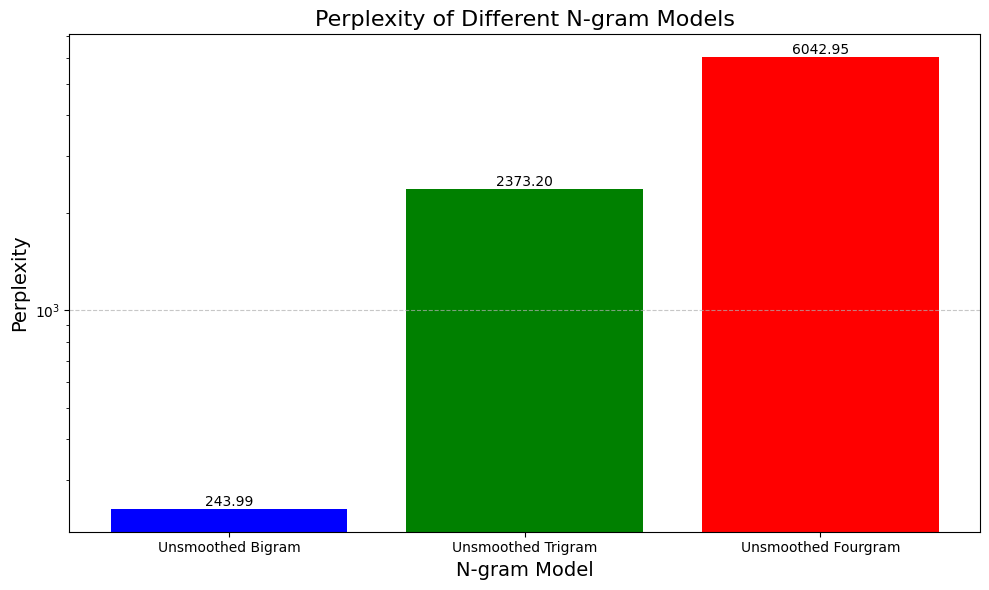

In [183]:
# Function to compare perplexity based on n-grams
def visualize_perplexity(perplexity_values, ngram_labels):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(ngram_labels, perplexity_values, color=['blue', 'green', 'red'])

    plt.title('Perplexity of Different N-gram Models', fontsize=16)
    plt.xlabel('N-gram Model', fontsize=14)
    plt.ylabel('Perplexity', fontsize=14)
    plt.yscale('log')  # Use log scale for better visibility if values vary widely
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate the bars with actual perplexity values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage
perplexity_values = [unsmoothed_bigram_perplexity, unsmoothed_trigram_perplexity, unsmoothed_fourgram_perplexity]
ngram_labels = ['Unsmoothed Bigram', 'Unsmoothed Trigram', 'Unsmoothed Fourgram']

visualize_perplexity(perplexity_values, ngram_labels)


The visualisation shows a clear trend of increasing perplexity the bigger the n-grams, which suggests lower n-gram values perform better in terms of prediction in this context.

**Perplexity Values Interpretation:**

1. **Unsmoothed Bigram Perplexity: 243.99**
   - **Interpretation**: The model is uncertain about around 244 possible next words in a bigram context.
   - **Implication**: This suggests that the bigram model effectively captures word dependencies based on the immediate preceding word.

2. **Unsmoothed Trigram Perplexity: 2373.20**
   - **Interpretation**: The model predicts approximately 2373 potential next words when considering the two preceding words.
   - **Implication**: The significant increase in perplexity indicates that the trigram model struggles to generalize from the training data, possibly due to data sparsity.

3. **Unsmoothed Fourgram Perplexity: 6042.95**
   - **Interpretation**: The model predicts about 6043 possible next words based on the three preceding words.
   - **Implication**: The high perplexity suggests that the fourgram model faces challenges in accurate prediction, likely due to data sparsity or increased model complexity.

**General Insights:**
- **Trend of Increasing Perplexity**: The increasing perplexity values from bigram to fourgram indicate that the model's ability to utilize context effectively diminishes with higher n-grams.
- **Model Comparison**: Lower perplexity values indicate better model performance, with the bigram model performing best, followed by the trigram, and the fourgram exhibiting the highest perplexity.

**Conclusion:**

The perplexity values suggest that while the bigram model is reasonably effective, the trigram and fourgram models show declining performance, indicating potential data sparsity issues or excessive complexity, necessitating the exploration of additional smoothing techniques or more training data.

#### 4.1.2 Perplexity: Comparison of Smoothing Techniques

In [184]:
# Calculate perplexities for smoothed bigrams (Laplace, Good-Turing, Kneser-Ney)
laplace_bigram_perplexity = calculate_perplexity(smoothed_bigram_probabilities, bigram_test_set)
good_turing_bigram_perplexity = calculate_perplexity(good_turing_bigram_probabilities, bigram_test_set)
kneser_ney_bigram_perplexity = calculate_perplexity(kneser_ney_bigram_probabilities, bigram_test_set)

# Calculate perplexities for smoothed trigrams (Laplace, Good-Turing, Kneser-Ney)
laplace_trigram_perplexity = calculate_perplexity(smoothed_trigram_probabilities, trigram_test_set)
good_turing_trigram_perplexity = calculate_perplexity(good_turing_trigram_probabilities, trigram_test_set)
kneser_ney_trigram_perplexity = calculate_perplexity(kneser_ney_trigram_probabilities, trigram_test_set)

# Calculate perplexities for smoothed fourgrams (Laplace, Good-Turing, Kneser-Ney)
laplace_fourgram_perplexity = calculate_perplexity(smoothed_fourgram_probabilities, fourgram_test_set)
good_turing_fourgram_perplexity = calculate_perplexity(good_turing_fourgram_probabilities, fourgram_test_set)
kneser_ney_fourgram_perplexity = calculate_perplexity(kneser_ney_fourgram_probabilities, fourgram_test_set)


I then visualised these perplexities for a better comparison of the effect of smooothing techniques, including the unsmoothed n-gram perplexities.

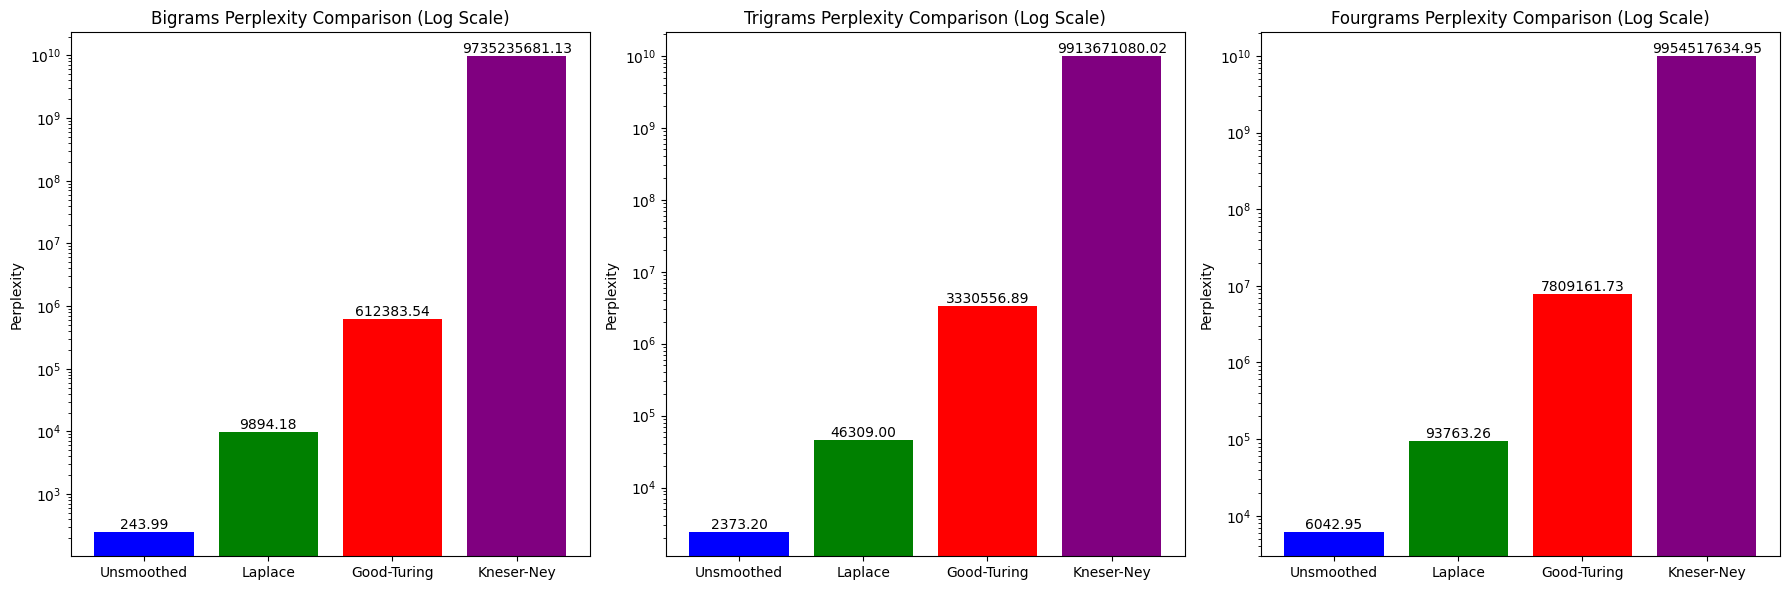

In [185]:
#perplexity comparison
def plot_perplexity_comparison():
    ngrams = ['Bigrams', 'Trigrams', 'Fourgrams']

    # Perplexities for unsmoothed models
    unsmoothed_perplexities = [unsmoothed_bigram_perplexity, unsmoothed_trigram_perplexity, unsmoothed_fourgram_perplexity]

    # Perplexities for Laplace smoothed models
    laplace_perplexities = [laplace_bigram_perplexity, laplace_trigram_perplexity, laplace_fourgram_perplexity]

    # Perplexities for Good-Turing smoothed models
    good_turing_perplexities = [good_turing_bigram_perplexity, good_turing_trigram_perplexity, good_turing_fourgram_perplexity]

    # Perplexities for Kneser-Ney smoothed models
    kneser_ney_perplexities = [kneser_ney_bigram_perplexity, kneser_ney_trigram_perplexity, kneser_ney_fourgram_perplexity]

    # Set up the figure
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: Unsmoothened vs. Smoothed Bigrams
    bars = ax[0].bar(['Unsmoothed', 'Laplace', 'Good-Turing', 'Kneser-Ney'],
                     [unsmoothed_bigram_perplexity, laplace_bigram_perplexity, good_turing_bigram_perplexity, kneser_ney_bigram_perplexity],
                     color=['blue', 'green', 'red', 'purple'])
    ax[0].set_title('Bigrams Perplexity Comparison (Log Scale)')
    ax[0].set_ylabel('Perplexity')
    ax[0].set_yscale('log')  # Set y-axis to logarithmic scale

    # Annotate the bars with actual values
    for bar in bars:
        yval = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    # Plot 2: Unsmoothened vs. Smoothed Trigrams
    bars = ax[1].bar(['Unsmoothed', 'Laplace', 'Good-Turing', 'Kneser-Ney'],
                     [unsmoothed_trigram_perplexity, laplace_trigram_perplexity, good_turing_trigram_perplexity, kneser_ney_trigram_perplexity],
                     color=['blue', 'green', 'red', 'purple'])
    ax[1].set_title('Trigrams Perplexity Comparison (Log Scale)')
    ax[1].set_ylabel('Perplexity')
    ax[1].set_yscale('log')  # Set y-axis to logarithmic scale

    # Annotate the bars with actual values
    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    # Plot 3: Unsmoothened vs. Smoothed Fourgrams
    bars = ax[2].bar(['Unsmoothed', 'Laplace', 'Good-Turing', 'Kneser-Ney'],
                     [unsmoothed_fourgram_perplexity, laplace_fourgram_perplexity, good_turing_fourgram_perplexity, kneser_ney_fourgram_perplexity],
                     color=['blue', 'green', 'red', 'purple'])
    ax[2].set_title('Fourgrams Perplexity Comparison (Log Scale)')
    ax[2].set_ylabel('Perplexity')
    ax[2].set_yscale('log')  # Set y-axis to logarithmic scale

    # Annotate the bars with actual values
    for bar in bars:
        yval = bar.get_height()
        ax[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Call the function to visualize the perplexity comparison
plot_perplexity_comparison()


## Discussion: Complexity and Accuracy Trade-offs in NLP

In the realm of natural language processing (NLP), there exists a significant trade-off between model complexity and accuracy, particularly when utilizing n-gram models for language modeling. As observed in my analysis, more complex models, such as higher-level trigrams and four-grams, alongside advanced smoothing techniques like Kneser-Ney and Laplace smoothing, often result in increased perplexity values. Perplexity, a common metric used to evaluate language models, indicates how well a probability distribution predicts a sample. Higher perplexity scores suggest that the model struggles to accurately predict the next word in a sequence, which can counterintuitively suggest lower performance despite the model's complexity.

One primary reason for the elevated perplexity in more complex models is the overfitting phenomenon. As the model complexity increases, particularly with higher-order n-grams, there is a greater likelihood that the model will capture noise in the training data rather than the underlying patterns of the language. This results in a model that performs well on the training set but poorly on unseen data, as it lacks the generalization needed for effective predictions. Furthermore, higher-order n-grams require significantly more data to train effectively, and in scenarios where training data is limited, the model may not learn meaningful relationships, further exacerbating the perplexity issue.

On the other hand, while simpler models like unigrams or bigrams may exhibit lower perplexity due to their reduced complexity and tendency to generalize better, they often fail to capture the nuanced dependencies between words that are crucial for accurate language modeling. For example, in sentences where context plays a significant role, such as in idiomatic expressions or phrases with specific syntactic structures, simpler models may overlook essential relationships, leading to less accurate predictions. Therefore, the challenge lies in striking a balance between model complexity and accuracy. It is crucial to carefully consider the specific requirements of the task at hand and the characteristics of the available data to determine the optimal level of complexity that provides the best performance without incurring the costs associated with higher perplexity.